In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential 
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from skimage.transform import resize
import h5py
import os
import cv2


In [1]:
with open('binary_weights_FP_scaled.txt', 'r') as file:
    lines = file.readlines()

array_str = ','.join(line.strip() for line in lines)

with open('binary_weights_FP_scaled.txt' , 'w') as file:
    file.write(array_str)

In [3]:
# # Load MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # Function to resize and normalize each image by its max pixel value
# def resize_and_normalize(images, new_size=(42, 42)):
#     resized_images = np.zeros((images.shape[0], new_size[0], new_size[1]))
#     for i in range(images.shape[0]):
#         resized = resize(images[i], new_size, mode='reflect', anti_aliasing=True)
#         max_pixel_value = np.max(resized)
#         if max_pixel_value > 0:  # Avoid division by zero
#             resized_images[i] = resized / max_pixel_value
#         else:
#             resized_images[i] = resized  # If max is 0, just use the resized image
#     return resized_images

# # Resize and normalize images
# x_train_resized = resize_and_normalize(x_train)
# x_test_resized = resize_and_normalize(x_test)

# # Reshape to add channel dimension (required for Keras)
# x_train_resized = x_train_resized.reshape(-1, 42, 42, 1)
# x_test_resized = x_test_resized.reshape(-1, 42, 42, 1)

# # One-hot encode labels
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# print(x_test_resized[0].shape) 

(42, 42, 1)


In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to 42x42 using OpenCV
x_train_resized = np.zeros((x_train.shape[0], 42, 42), dtype=np.uint8)
for i in range(x_train.shape[0]):
    x_train_resized[i] = cv2.resize(x_train[i], (42, 42))

x_test_resized = np.zeros((x_test.shape[0], 42, 42), dtype=np.uint8)
for i in range(x_test.shape[0]):
    x_test_resized[i] = cv2.resize(x_test[i], (42, 42))

# Reshape to add channel dimension (required for Keras)
x_train_resized = x_train_resized.reshape(-1, 42, 42, 1)
x_test_resized = x_test_resized.reshape(-1, 42, 42, 1)

for i in range(x_train.shape[0]):
    x_train_resized[i] = x_train_resized[i]/2

for i in range(x_test.shape[0]):
    x_test_resized[i] = x_test_resized[i]/2

x_test_max = np.max(x_test_resized)
print(x_test_max)
print(x_test_resized.shape)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)




127
(10000, 42, 42, 1)


In [4]:
# print(x_test.shape)
# for row in x_test_resized[0]:
#     print(' '.join(map(lambda pixel: '{:3}'.format(float(pixel)), row)))

# for row in x_test[0]:
#     print(' '.join(map(lambda pixel: '{:3}'.format(float(pixel)), row)))

In [4]:
def convert_to_binary(images):
    binary_images = []

    for img in images:
        binary_img = []

        for pixel_value in np.nditer(img):
            binary_str = format(pixel_value, '08b')
            binary_img.append(binary_str)

        binary_images.append(binary_img)

    return binary_images

# Convert x_test_resized and x_train_resized to binary
binary_x_test_resized = convert_to_binary(x_test_resized)
binary_x_train_resized = convert_to_binary(x_train_resized)

In [5]:
def binary_to_float(binary_str):
    weights = [-8, 4, 2, 1, 0.5, 0.25, 0.125, 0.0625]
    
    result = 0
    
    for i, bit in enumerate(binary_str):
        result += int(bit) * weights[i]
    
    return result

def convert_to_float(binary_images):
    float_images = []

    for img in binary_images:
        float_img = []

        for binary_str in img:
            float_value = binary_to_float(binary_str)
            float_img.append(float_value)
        
        float_img = np.array(float_img).reshape((42, 42))
        float_images.append(float_img)

    return np.array(float_images)

# Convert binary_x_test_resized and binary_x_train_resized to floating point values as numpy arrays
FP_x_test_resized = convert_to_float(binary_x_test_resized)
FP_x_train_resized = convert_to_float(binary_x_train_resized)

FP_x_train_resized = FP_x_train_resized.reshape(-1, 42, 42, 1)
FP_x_test_resized = FP_x_test_resized.reshape(-1, 42, 42, 1)

In [6]:
max_val = np.max(FP_x_test_resized)
print(max_val)
print(FP_x_test_resized.shape)
for row in FP_x_test_resized[0]:
    print(' '.join(map(lambda pixel: '{:3}'.format(float(pixel)), row)))

7.9375
(10000, 42, 42, 1)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.

C:\Users\Rishit Thakkar\AppData\Local\Temp\ipykernel_9584\3202260793.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(' '.join(map(lambda pixel: '{:3}'.format(float(pixel)), row)))


# Code for the Accuracy of Floating point for the whole test dataset

In [34]:
import matplotlib.pyplot as plt

total_correct = 0
total_errors = 0
model = load_model('model_weights_FP.h5')
weights_and_biases = np.loadtxt("model_weights_FP.txt")

weights_shape = (3, 3, 1, 4)  # Assuming kernel size of (3, 3) and 4 filters
weights2_shape = (3, 3, 4, 4)
weights3_shape = (324, 10)

weights = weights_and_biases[0:36].reshape(weights_shape)  # weights
biases = weights_and_biases[36:40]  # biases

weights2 = weights_and_biases[40:184].reshape(weights2_shape)
biases2 = weights_and_biases[184:188]

weights3 = weights_and_biases[188:3428].reshape(weights3_shape)
biases3 = weights_and_biases[3428:3438]

#Model Below
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(42, 42, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))

model.layers[0].set_weights([weights, biases])
model.layers[2].set_weights([weights2, biases2])
model.layers[5].set_weights([weights3, biases3])

for val in range(len(FP_x_test_resized)):
  img_array = FP_x_test_resized[val].flatten()

  # img_array *= 100    # for binary conversion: ask prof

  np.savetxt("mnist_image_1.txt", img_array , fmt='%.6f', newline='\n' )


  img_array = np.loadtxt('mnist_image_1.txt')
  img_array = img_array.reshape((1, 42, 42, 1))  # Reshape to (batch_size, height, width, channels)

  conv1_output = model.predict(img_array)

  # Save the convolutional layer output
  # print("Output shape of the Dense layer:", conv1_output.shape)

  # Save the dense layer output
  with open('Python_prog_out_Dense.txt', 'w') as file:
      file.write("Channel 1: \n")
      for i in range(conv1_output.shape[1]):
          file.write("%0.2f\n" % (conv1_output[0, i]))

  # print("Dense layer output saved")


  #################################################################
  output_values = []

  # Read the file
  with open('Python_prog_out_Dense.txt', 'r') as file:
      lines = file.readlines()
      for line in lines[1:]:
          output_values.append(float(line.strip()))  

  predicted_class = np.argmax(output_values)

  actual_class = np.argmax(y_test[val])

  if predicted_class == actual_class:
    total_correct += 1
  else:
    total_errors += 1

print(f"Total Correct Predictions: {total_correct}")
print(f"Total Errors: {total_errors}")

print(f"Accuracy = {(total_correct/(total_correct+total_errors))*100}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

# Takes in all the test set, converts into binary and saves all as arrays in a text file

In [8]:
import numpy as np

def write_arrays_to_text(data_filename, output_filename, image_index):
    with open(data_filename, "r") as data_file, open(output_filename, "a") as output_file:
        image_data = data_file.read().strip()  # Read and strip extra newlines
        output_file.write(f"int8_t image_{image_index+1} [] = {{{{{image_data}}}}};\n")

def converter(num):
    int_part = int(num)
    frac_part = abs(num - int_part)

    if num < 0:
        binary_string = "1"
        num += 8  
    else:
        binary_string = "0"

    for power in [4, 2, 1]:
        if num >= power:
            binary_string += "1"
            num -= power
        else:
            binary_string += "0"

    for place_value in [0.5, 0.25, 0.125, 0.0625]:
        if frac_part >= place_value:
            binary_string += "1"
            frac_part -= place_value
        else:
            binary_string += "0"

    return "0b" + binary_string

def convert_from_file(filename, output_filename):
    with open(filename, "r") as input_file, open(output_filename, "w") as output_file:
        for line in input_file:
            num = float(line.strip())
            binary_string = converter(num)
            output_file.write(binary_string + "\n")

# File to store class labels
labels_filename = "mnist_labels.txt"
with open(labels_filename, 'w') as labels_file:
    for val in range(len(FP_x_test_resized)):
        img_array = FP_x_test_resized[val].flatten()
        # img_array *= 100  # Assuming scaling is required before conversion

        np.savetxt("mnist_image_1.txt", img_array, fmt='%.6f', newline='\n')

        filename = "mnist_image_1.txt"
        output_filename = "binary_" + filename
        convert_from_file(filename, output_filename)

        # Read binary output, format as comma-separated string
        with open(output_filename, 'r') as file:
            lines = file.readlines()
        array_str = ','.join(line.strip() for line in lines)

        # Write formatted binary data to a temporary file
        temp_data_filename = "temp_binary_mnist_image_1.txt"
        with open(temp_data_filename, 'w') as file:
            file.write(array_str)

        # Append formatted data to the main output file
        write_arrays_to_text(temp_data_filename, "image_data_FP.txt", val)

        # Write the class label to the labels file
        class_label = np.argmax(y_test[val])  # Assuming y_test is one-hot encoded
        labels_file.write(f"{class_label}\n")


In [36]:
import numpy as np

def write_arrays_to_text(data_filename, output_filename, image_index):
    with open(data_filename, "r") as data_file, open(output_filename, "a") as output_file:
        image_data = data_file.read().strip()  # Read and strip extra newlines
        output_file.write(f"float fl_image_{image_index+1} [] = {{{{{image_data}}}}};\n")


# File to store class labels
labels_filename = "mnist_labels_FP.txt"
with open(labels_filename, 'w') as labels_file:
    for val in range(len(FP_x_test_resized)):
        img_array = FP_x_test_resized[val].flatten()
        np.savetxt("mnist_image_1.txt", img_array, fmt='%.6f', newline='\n')

        filename = "mnist_image_1.txt"

        # Read binary output, format as comma-separated string
        with open(filename, 'r') as file:
            lines = file.readlines()
        array_str = ','.join(line.strip() for line in lines)

        # Write formatted binary data to a temporary file
        temp_data_filename = "temp_binary_mnist_image_1.txt"
        with open(temp_data_filename, 'w') as file:
            file.write(array_str)

        # Append formatted data to the main output file
        write_arrays_to_text(temp_data_filename, "fl_image_data.txt", val)

        # Write the class label to the labels file
        class_label = np.argmax(y_test[val])  # Assuming y_test is one-hot encoded
        labels_file.write(f"{class_label}\n")


In [6]:
def generate_images_array_content(num_images=10000):
    # Generate the content inside the curly braces
    images_list = ', '.join(f'fl_image_{i}' for i in range(1, num_images + 1))
    # Form the complete line to write to the file
    content = f"float* fl_images[{num_images}] = {{{images_list}}};"
    return content

def write_to_file(filename, content):
    # Write the content to the specified file
    with open(filename, 'w') as file:
        file.write(content)

def main():
    filename = "output.c"  # Set the filename
    content = generate_images_array_content()  # Generate the array content
    write_to_file(filename, content)  # Write the content to the file
    print(f"Content written to {filename} successfully.")

if __name__ == "__main__":
    main()


Content written to output.c successfully.


# Testing with individual Images from the test set

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


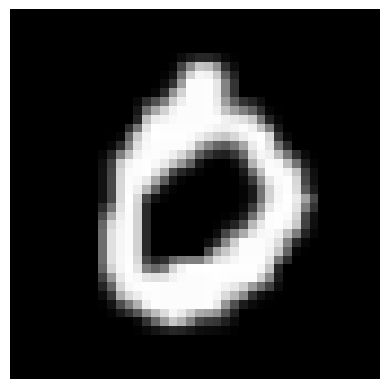

In [12]:
import matplotlib.pyplot as plt
val = 3
img_array = x_test_resized[val].flatten()

# img_array *= 100    # for binary conversion: ask prof

print(y_test[val])
np.savetxt("mnist_image_1.txt", img_array , fmt='%.6f', newline='\n' )


img_array = x_test_resized[val].reshape(42, 42)

# Plot the image
plt.imshow(img_array, cmap='gray')
plt.axis('off')  # Hide axes
plt.show()



In [4]:
def converter(num):

  int_part = int(num)
  frac_part = abs(num - int_part)

  if num < 0:
    binary_string = "1"
    num += 8  
  else:
    binary_string = "0"

  for power in [4, 2, 1]:
    if num >= power:
      binary_string += "1"
      num -= power
    else:
      binary_string += "0"

  for place_value in [0.5, 0.25, 0.125, 0.0625]:
    if frac_part >= place_value:
      binary_string += "1"
      frac_part -= place_value
    else:
      binary_string += "0"

  return "0b" + binary_string

def convert_from_file(filename, output_filename):
  with open(filename, "r") as input_file, open(output_filename, "w") as output_file:
    for line in input_file:
      num = float(line.strip())  
      binary_string = converter(num)
      output_file.write(binary_string + "\n")

filename = "mnist_image_1.txt"  
output_filename = "binary_" + filename
convert_from_file(filename, output_filename)

print(f"Converted data from {filename} to binary and saved in {output_filename}")

Converted data from mnist_image_1.txt to binary and saved in binary_mnist_image_1.txt


In [13]:
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint


model = load_model('model_weights_2.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.9642 - loss: 0.1064
Test Loss: 0.09022897481918335
Test Accuracy: 0.9726999998092651


In [14]:
weights_and_biases = np.loadtxt("model_weights_2.txt")

weights_shape = (3, 3, 1, 4)  # Assuming kernel size of (3, 3) and 4 filters
weights2_shape = (3, 3, 4, 4)
weights3_shape = (324, 10)

weights = weights_and_biases[0:36].reshape(weights_shape)  # weights
biases = weights_and_biases[36:40]  # biases

weights2 = weights_and_biases[40:184].reshape(weights2_shape)
biases2 = weights_and_biases[184:188]

weights3 = weights_and_biases[188:3428].reshape(weights3_shape)
biases3 = weights_and_biases[3428:3438]

#Model Below
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(42, 42, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))

model.layers[0].set_weights([weights, biases])
model.layers[2].set_weights([weights2, biases2])
model.layers[5].set_weights([weights3, biases3])


img_array = np.loadtxt('mnist_image_1.txt')
img_array = img_array.reshape((1, 42, 42, 1))  # Reshape to (batch_size, height, width, channels)

conv1_output = model.predict(img_array)

# Save the convolutional layer output
print("Output shape of the Dense layer:", conv1_output.shape)

# Save the dense layer output
with open('Python_prog_out_Dense.txt', 'w') as file:
    file.write("Channel 1: \n")
    for i in range(conv1_output.shape[1]):
        file.write("%0.2f\n" % (conv1_output[0, i]))

print("Dense layer output saved")


#################################################################
output_values = []

# Read the file
with open('Python_prog_out_Dense.txt', 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:
        output_values.append(float(line.strip()))  

predicted_class = np.argmax(output_values)

actual_class = np.argmax(y_test[val])

print(actual_class)

if predicted_class == actual_class:
  print(f"Prediction is Correct!  Predicted: {predicted_class}, Actual: {actual_class}")
else:
  print(f"Prediction is Incorrect. Predicted: {predicted_class}, Actual: {actual_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Output shape of the Dense layer: (1, 10)
Dense layer output saved
0
Prediction is Correct!  Predicted: 0, Actual: 0
